In [1]:
import pandas as pd

In [2]:
#loading data
data=pd.read_csv('sales.csv')

In [3]:
#get first 5 rows of dataset to know about data
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#to find number of observation and features
data.shape

(200, 5)

In [5]:
#get basic indo of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#removing unnamed column 
data=data.drop('Unnamed: 0',axis=1)

In [7]:
#finding null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#finding duplicate values
data.duplicated().sum()

0

#### EDA process

In [9]:
#get statistical features
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

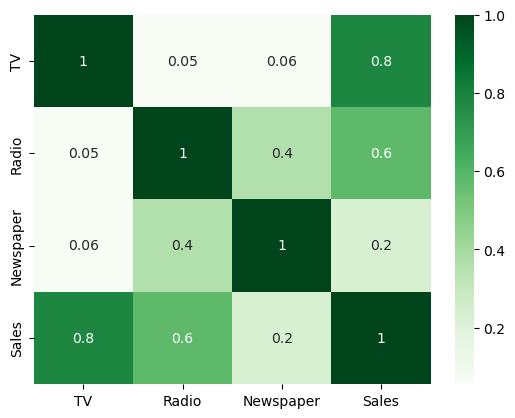

In [11]:
#heatmap for correlation
df=data.corr()
sns.heatmap(df,annot=True,fmt='.1g',cmap='Greens')

##### TV  ad is correlated to Sales

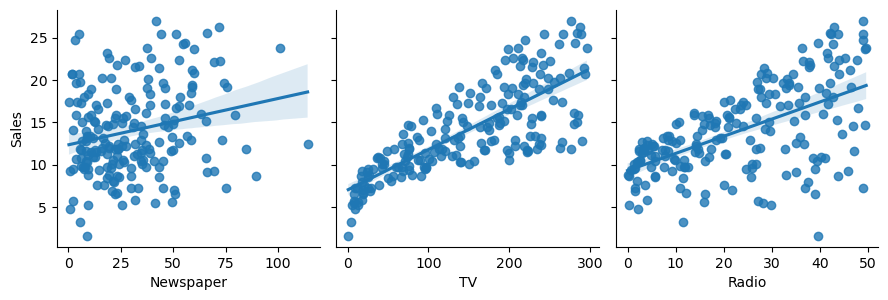

In [12]:
# Create a pair plot to visualize relationships among advertising channels and sales
sns.pairplot(data, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg',height=3)

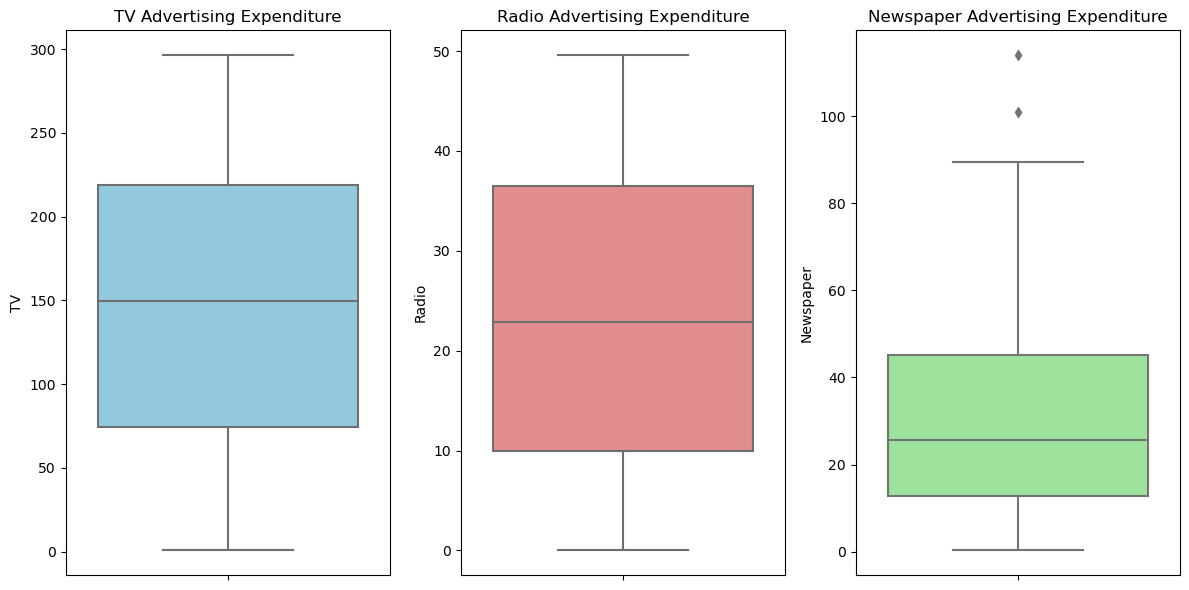

In [13]:
# Create box plots for each advertising platform
plt.figure(figsize=(12, 6))

# Box plot for TV advertising expenditures
plt.subplot(131)
sns.boxplot(y=data['TV'], color='skyblue')
plt.title('TV Advertising Expenditure')

# Box plot for Radio advertising expenditures
plt.subplot(132)
sns.boxplot(y=data['Radio'], color='lightcoral')
plt.title('Radio Advertising Expenditure')

# Box plot for Newspaper advertising expenditures
plt.subplot(133)
sns.boxplot(y=data['Newspaper'], color='lightgreen')
plt.title('Newspaper Advertising Expenditure')

plt.tight_layout()
plt.show()

In [14]:
# Create spending levels based on advertising expenditures
spending_levels = {
    'Low': (0, 50),
    'Moderate': (50, 100),
    'High': (100, 200),
    'Very High': (200, float('inf'))
}

# Function to categorize spending levels and apply to each advertising channel
def categorize_spending(row, column_name):
    for level, (min_value, max_value) in spending_levels.items():
        if min_value <= row[column_name] < max_value:
            return level
    return 'Undefined'

# Apply the spending level categorization to each channel
data['TV_Spending_Level'] = data.apply(lambda row: categorize_spending(row, 'TV'), axis=1)
data['Radio_Spending_Level'] = data.apply(lambda row: categorize_spending(row, 'Radio'), axis=1)
data['Newspaper_Spending_Level'] = data.apply(lambda row: categorize_spending(row, 'Newspaper'), axis=1)

# Group the data by spending levels and calculate the mean or median sales for each level
sales_summary_tv = data.groupby('TV_Spending_Level')['Sales'].mean().reset_index()
sales_summary_radio = data.groupby('Radio_Spending_Level')['Sales'].mean().reset_index()
sales_summary_newspaper = data.groupby('Newspaper_Spending_Level')['Sales'].mean().reset_index()

# Print or visualize the results
print("TV Spending Level vs. Mean Sales:")
print(sales_summary_tv)

print("\nRadio Spending Level vs. Mean Sales:")
print(sales_summary_radio)

print("\nNewspaper Spending Level vs. Mean Sales:")
print(sales_summary_newspaper)

TV Spending Level vs. Mean Sales:
  TV_Spending_Level      Sales
0              High  14.701587
1               Low   7.686111
2          Moderate  10.858824
3         Very High  18.394030

Radio Spending Level vs. Mean Sales:
  Radio_Spending_Level    Sales
0                  Low  14.0225

Newspaper Spending Level vs. Mean Sales:
  Newspaper_Spending_Level      Sales
0                     High  18.150000
1                      Low  13.336420
2                 Moderate  16.880556


#### Expenditure on TV is very high as compare to Newspaper then Radio

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Splitting data to train and test
X=data[['TV','Radio','Newspaper']]
y=data['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=3)

### Linear model

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train.values,y_train)

LinearRegression()

In [18]:
predictions=model.predict(X_test.values)
print('Accuracy for training data:',(model.score(X_train.values,y_train))*100)
print('Accuracy for test data:',(model.score(X_test.values,y_test))*100)

Accuracy for training data: 89.30288385772916
Accuracy for test data: 91.38375011080568


In [19]:
# Sample new data with the same feature columns as the original dataset
new_df = pd.DataFrame({
    'TV': [200, 150, 300],
    'Radio': [20, 10, 30],
    'Newspaper': [10, 5, 15]
})

new_predictions = model.predict(new_df[['TV', 'Radio', 'Newspaper']])

# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)


Predictions for New Data:
[15.73128362 11.59759075 22.141435  ]


C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
